In [ ]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

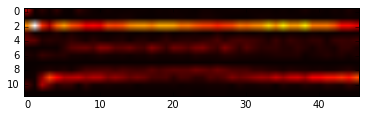

In [3]:
#############################################################################
##Remember to put the contents of the chord database in the folder "./data"##
#############################################################################

#A sample snippet for getting chroma features from a file
[Fs, x] = audioBasicIO.readAudioFile("./data/a/a1.wav");
F = audioFeatureExtraction.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs);
# plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel('ZCR'); 
# plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel('Energy'); plt.show()
cr = plt.imshow(F[21:33,:],cmap="hot")

In [4]:
# Things to do:
# Batch extract chroma features from files and mark them with classes
# How will we do training? Can we stream the data or will all of it have to fit in the RAM at the same time?
# Does it even fit in RAM? If it fits, just make one big matrix with a class column
# If not, find a physical format for storing the chroma features.
# Documentation for batch extraction commands: 
# https://github.com/tyiannak/pyAudioAnalysis/wiki/3.-Feature-Extraction

In [ ]:
#Extract chroma features for the whole database
import os
import errno

def mkdirp(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

dataRootDir = "./data"
featuresRootDir = "./features"
mkdirp(featuresRootDir)
mtWin = 1.0
mtStep = 1.0
stWin = 0.050
stStep = 0.025
for subdir, dirs, files in os.walk(dataRootDir):
    for file in files:
        if file[0] == ".":
            continue #This is for avoiding .DS_Store and similar files
        print("Processing file " + os.path.join(subdir, file))
        featureClassDir = featuresRootDir + subdir[len(dataRootDir):];
        mkdirp(featureClassDir)
#         print(os.path.join(featureClassDir,file))
        audioFeatureExtraction.mtFeatureExtractionToFile(os.path.join(subdir, file), mtWin, mtStep, stWin, stStep,os.path.join(featureClassDir,file),storeStFeatures=True)

Example feature vector:
[ 0.00133036  0.00048629  0.15267703  0.00119704  0.00965221  0.01253298
  0.01230934  0.00024735  0.00921758  0.06432284  0.01703012  0.00025681]


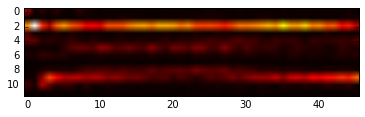

In [6]:
#To read the features from disk, we must open the relevant file ending with "_st.npy"
stFeatures = np.load(featuresRootDir + "/a/a1.wav_st.npy")
#The chroma features will be in the 22-33
chromaPlot = plt.imshow(stFeatures[21:33,:],cmap="hot")
#When it's time to train a machine learning model, each column of this matrix will be a feature vector
#For example, if we want to get the 5th column as a feature vector, we would do this:
featureVector = stFeatures[21:33,5];
print("Example feature vector:")
print(featureVector)